<h1 style='color:white'>TP Integrador</h1>
<center><img src ='img/portada.png'></center>

In [ ]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos
!pip install openpyxl==3.0.10


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 25.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
<li>¿Que dispositivo tuvo mayor demanda en Brasil, Peru, Argentina y Colombia?</li>
<li>¿Que vendedores llegaron al objetivo de ventas este mes? ¿En cual semana del mes llego?</li>
<li>¿Que paises generaron pocos ingresos?</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>
<ul>
<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [ ]:
# Levanto los datos en 3 diferentes dataframes

# ARTÍCULOS
conn = sql3.connect('/work/data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id','article_name','unit_price'])
print(df_articles)

    article_id      article_name unit_price
0        20015        Smartphone     525.00
1        20016           Full Pc    2127.81
2        20017           Monitor     230.00
3        20018            Tablet     130.00
4        20019              Desk     130.10
5        20020             Chair     335.64
6        20021             Modem      67.50
7        20022    Range Extender      20.45
8        20023          Notebook    1000.00
9        20024           Netbook     145.00
10       20025               HDD      54.62
11       20026               SDD      22.00
12       20027        Ram Memory      35.95
13       20028       Motherboard     138.38
14       20029             Mouse      30.30
15       20030        Fan Cooler       4.25
16       20031            Webcam      20.07
17       20032          Keyboard      22.60
18       20033        Headphones      23.30
19       20034           Scanner     185.00
20       20035              Case      37.90
21       20036        Video Card

In [ ]:
# VENDEDORES
df_sellers = pd.read_excel('/work/data/sellers.xlsx', index_col=0)
print(df_sellers)

                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres
6           Milly Christoffe
7                 Kati Innot
8              Tobin Roselli
9               Onida Cosely
10           Cirilo Grandham
11           Vasily Danilyuk
12          Brockie Patience
13           Arnold Kilkenny
14            Janel O'Curran
15           Daisie Slograve


In [ ]:
# ÓRDENES
df_orders = pd.read_csv('/work/data/orders.csv')
print(df_orders)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [ ]:
# Exploración del df de artículos
print('Muestra de datos')
print(df_articles.head())
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBúsqueda de valores nulos')
print(df_articles.isnull().sum())
print('\nFormato de los datos')
print(df_articles.dtypes)

Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Búsqueda de valores nulos
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploración del df de vendedores
print('Muestra de datos')
print(df_sellers.head())
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores nulos')
print(df_sellers.isnull().sum())
print('\nFormato de los datos')
print(df_sellers.dtypes)


Muestra de datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Búsqueda de valores nulos
seller_name    0
dtype: int64

Formato de los datos
seller_name    object
dtype: object


In [ ]:
# Exploración del df de órdenes
print('Muestra de datos')
print(df_orders.head())
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBúsqueda de valores nulos')
print(df_orders.isnull().sum())
print('\nFormato de los datos')
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Búsqueda de valores nulos
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [ ]:
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='img/modelo.png'>


<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [ ]:
# Creo una copia del df_orders
my_df = df_orders.copy()

# Cambio el índice del df_articles
df_articles.set_index('article_id', inplace=True)
print(df_articles.head())

           article_name  unit_price
article_id                         
20015        Smartphone      525.00
20016           Full Pc     2127.81
20017           Monitor      230.00
20018            Tablet      130.00
20019              Desk      130.10


In [ ]:
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico


In [ ]:
# agrego las columnas que me faltan
my_df = my_df.assign(article_name = my_df['article_id'])
my_df = my_df.assign(total_amount =  my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  article_name  \
0     15024     1       20039        10         10         Peru         20039   
1     15025     1       20029        15          5         Peru         20029   
2     15026     1       20024         5         14      Bolivia         20024   
3     15027     1       20018         9         14       Brazil         20018   
4     15028     1       20035         6         15       Mexico         20035   

   total_amount  seller_name  
0         20039           10  
1         20029            5  
2         20024           14  
3         20018           14  
4         20035           15  


In [ ]:
# reemplazar los datos ne las nuevas columnas
for i  in range(len(my_df.index)):
    # columna article_name
    # cargo el nombre del artículo en una variable
    article = df_articles.loc[my_df.loc[i]['article_name']]['article_name']
    # se lo asigno a la columna y registro que corresponde
    my_df.loc[i,'article_name']= article

    # columna total_amount
    my_df.loc[i,'total_amount'] = my_df.loc[i,'quantity'] * df_articles.loc[my_df.loc[i]['article_id']]['unit_price']

    # columna de seller_name    
    my_df.loc[i,'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_name']]['seller_name']
    
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  \
0     15024     1       20039        10         10         Peru   
1     15025     1       20029        15          5         Peru   
2     15026     1       20024         5         14      Bolivia   
3     15027     1       20018         9         14       Brazil   
4     15028     1       20035         6         15       Mexico   

    article_name  total_amount      seller_name  
0  Water Cooling         675.0  Cirilo Grandham  
1          Mouse         454.5      Ewell Peres  
2        Netbook         725.0   Janel O'Curran  
3         Tablet        1170.0   Janel O'Curran  
4           Case         227.4  Daisie Slograve  


In [ ]:
# elimino las columnas que no necesito
my_df.drop(['order_id', 'article_id','seller_id'], axis='columns', inplace=True)
print(my_df.head())

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df2 = my_df.groupby('article_name').sum()
por_cant = my_df2.sort_values('quantity', ascending=False)
print(por_cant['quantity'].head(1)) 


article_name
HDD    413
Name: quantity, dtype: int64


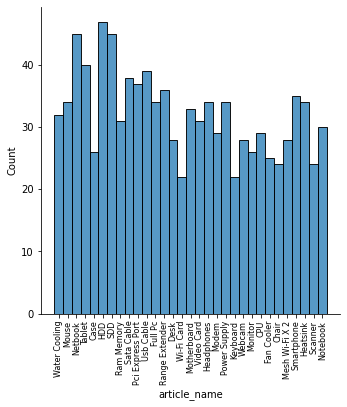

In [ ]:
# RESOLUCIÓN GRÁFICA
sns.displot(my_df, x='article_name')
plt.xticks(rotation=90, fontsize=8)
plt.show()


<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df3 = (my_df.groupby('article_name').sum()).sort_values('total_amount', ascending=False).head(5)
print(my_df3['total_amount'])


article_name
Full Pc       538335.93
Notebook      251000.00
Smartphone    152250.00
Chair          69477.48
Tablet         48620.00
Name: total_amount, dtype: float64


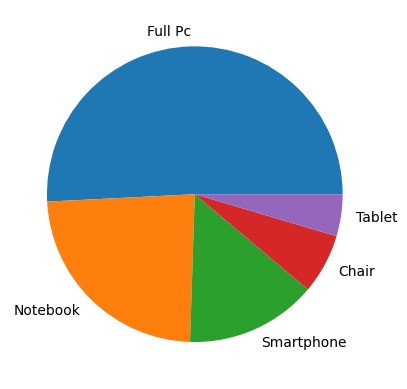

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.pie(x=my_df3['total_amount'],labels=my_df3.index) 
plt.show()

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
df4 = (my_df.groupby('seller_name').sum()).sort_values('total_amount', ascending=False)
print(df4[['quantity']+['total_amount']])


                   quantity  total_amount
seller_name                              
Janel O'Curran          703     192832.47
Brockie Patience        441     142709.88
Oliviero Charkham       555     141329.76
Vasily Danilyuk         521     129157.55
Daisie Slograve         554     120520.11
Aveline Swanwick        629     118874.33
Arnold Kilkenny         583      94552.04
Kati Innot              512      83704.62
Jase Doy                582      80628.31
Ewell Peres             496      78144.32
Onida Cosely            535      77373.37
Milly Christoffe        442      61733.69
Tobin Roselli           519      56984.42
Cornie Wynrehame        523      52253.57
Cirilo Grandham         470      45009.40


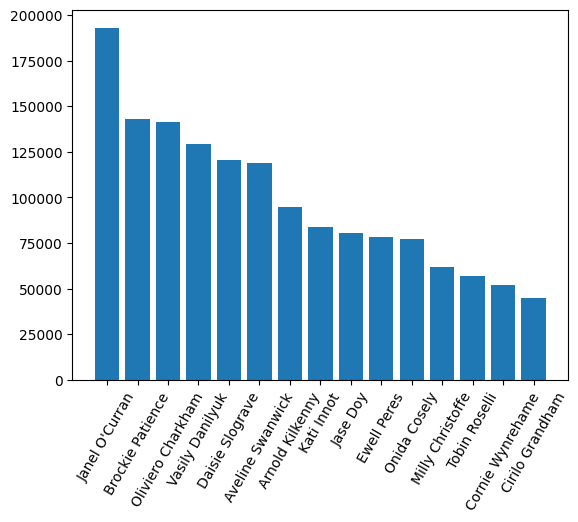

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(df4.index, df4['total_amount'])
plt.xticks(rotation=60)
plt.show()

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [ ]:
# RESOLUCIÓN ANALÍTICA
df5=(my_df.groupby('week').sum()).sort_values('total_amount',ascending=False)
print(df5)

      quantity  total_amount
week                        
1         2449     507458.81
2         2444     415364.44
3         2114     329140.03
4         1058     223844.56


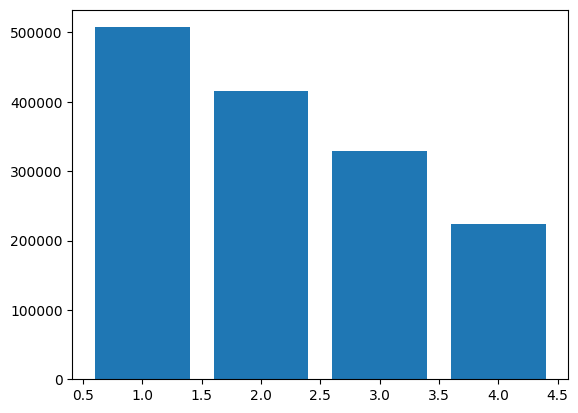

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(df5.index,df5['total_amount'])
plt.show()

<h3>5. ¿Que dispositivo tuvo mayor demanda en Brasil, Peru, Argentina y Colombia?</h3>

                           quantity
article_name country_name          
Tablet       Brazil             156
Notebook     Brazil              83
Smartphone   Brazil              79
Full Pc      Brazil              63
Smartphone   Colombia            52
Tablet       Peru                52
             Colombia            50
Full Pc      Argentina           45
Notebook     Argentina           43
Full Pc      Colombia            34
Notebook     Peru                32
Smartphone   Argentina           25
Full Pc      Peru                24
Notebook     Colombia            18
Smartphone   Peru                15
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


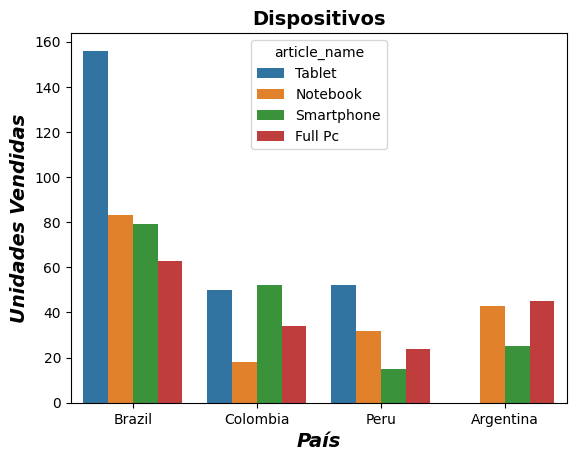

In [ ]:
df6=my_df[((my_df['country_name']=='Argentina') | (my_df['country_name']=='Brazil') | (my_df['country_name']=='Peru') |(my_df['country_name']=='Colombia') ) & 
((my_df['article_name']=='Full Pc')|(my_df['article_name']=='Notebook')|(my_df['article_name']=='Tablet')
|(my_df['article_name']=='Smartphone')) ]
df6 = df6.groupby(["article_name","country_name"]).sum().sort_values('quantity',ascending=False)
print(df6[['quantity']])

df6.reset_index('article_name', inplace=True)
sns.barplot(df6.index.get_level_values(0), 'quantity', data =df6, hue='article_name')

rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

plt.title('Dispositivos', size=14, fontweight='bold')
plt.ylabel('Unidades Vendidas',fontstyle='italic',fontsize=14, fontweight='bold')
plt.xlabel('País',fontstyle='oblique',fontsize=14, fontweight='heavy')
plt.show()

<h3>6. ¿Que vendedores llegaron al objetivo de ventas este mes?</h3> 
<h4> ¿En cual semana del mes llego?</h4>

                        quantity
seller_name       week          
Janel O'Curran    3          236
Arnold Kilkenny   2          218
Janel O'Curran    1          211
Aveline Swanwick  2          202
Tobin Roselli     1          201
Onida Cosely      2          201
Arnold Kilkenny   1          201
Jase Doy          3          195
Cornie Wynrehame  1          189
Janel O'Curran    2          185
Oliviero Charkham 3          183
Vasily Danilyuk   1          183
Jase Doy          1          178
Daisie Slograve   2          176
Kati Innot        2          171


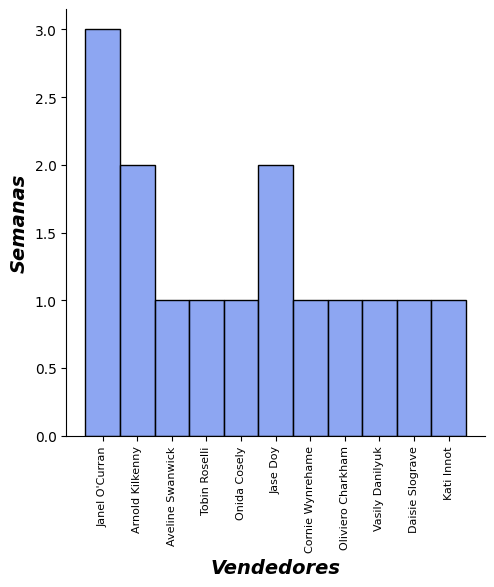

In [ ]:
# RESOLUCIÓN
df7 = (my_df.groupby(['seller_name','week']).sum()).sort_values('quantity', ascending=False).head(15)
print(df7[['quantity']])




sns.displot(df7, x='seller_name')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Semanas',fontstyle='italic',fontsize=14, fontweight='bold')
plt.xlabel('Vendedores',fontstyle='oblique',fontsize=14, fontweight='heavy')
plt.show()



<h3>7. ¿Que paises generaron pocos ingresos? </h3>

In [ ]:
df8 = (my_df.groupby('country_name').sum()).sort_values('total_amount', ascending=True).head(5)
print(df8[['total_amount']])

              total_amount
country_name              
Puerto Rico        1265.43
Paraguay           8195.12
Ecuador           17475.30
Uruguay           17843.09
Bolivia           22682.80


              quantity  total_amount
country_name                        
Puerto Rico         12       1265.43
Paraguay           123       8195.12
Ecuador            129      17475.30
Uruguay             92      17843.09
Bolivia            181      22682.80


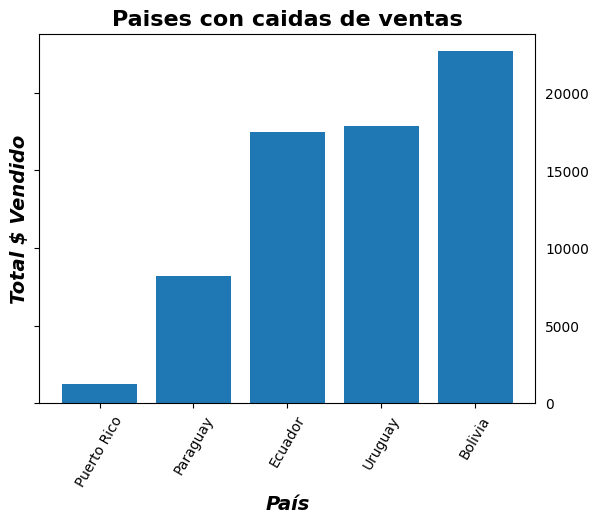

In [ ]:
df8=(my_df.groupby('country_name').sum()).sort_values('total_amount',ascending=True).head(5)
print(df8[['quantity']+['total_amount']])

# RESOLUCIÓN GRÁFICA
fig, graf5 = plt.subplots()
graf5.bar(df8.index,df8['total_amount'])
graf5.yaxis.set_tick_params(labelleft=False,labelright=True)
graf5.xaxis.set_tick_params(rotation=60)

plt.title('Paises con caidas de ventas', size=16, fontweight='bold')
plt.ylabel('Total $ Vendido',fontstyle='italic',fontsize=14, fontweight='bold')
plt.xlabel('País',fontstyle='oblique',fontsize=14, fontweight='heavy')
plt.show()

<h2>Conclusiones y propuestas</h2>

<h3> 1.¿Cuál es el artículo más vendido? (en unidades)</h3>
<ul>
<li>El producto más vendido fue el HDD con un cierre de 413 ventas. Con esto podemos observar en el gráfico que en segundo puesto esta el SSD lo que nos muestra que muchos de nuestros clientes valoran tener la comodidad de contar almacenamiento suficiente.</li>

<h3>2.¿Qué artículo es el que más ingresos nos proporcionó?</h3>
<li>El FULL PC es el artículo que más ingresos nos proporciono dejando una ganancia de $538,335.93</li>
<h3>3.¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>
<li>La persona que se lleva el bono a mejor vendedor del mes es Janem O'Curran que con 703 unidades vendidas lo tiene mas que merecido</li>
<h3>4.¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<li>Si hay, y la mas significativa está en la cuarta semana del mes por lo que es recomendable lanzar la campaña de promociones entre la primera y segunda semana del mes</li>
<h3>5.¿Que dispositivo tuvo mayor demanda en Brasil, Peru, Argentina y Colombia?</h3>
<li>En el caso de Brasil y Perú se nota claramente que predominan las tablets a diferencia de Colombia que prefieren los smartphones y Argentina los FULL PC</li>
<h3>6.¿Que vendedores llegaron al objetivo de ventas este mes?</h3>¿En cual semana del mes llego?
<li>Llegaron al objetivo: Janel O'Curran, Arnold Kilkenny, Aveline Swanwick, Tobin Roselli, Onida Cosely,
Jase Doy, Cornie Wynrehame, Oliviero Charkham, Vasily Danilyuk, Daisie Slograve y Kati Innot. Todos ellos llegaron en la primer semana del mes pero tambien se puede notar en el grafico que algunos se quedaron ahi y otros hasta llegaron a duplicar sus ventas.</li>
<h3>7.¿Que paises generaron pocos ingresos?</h3>
<li>Tuvieron una baja de ingresos los paises: Puerto Rico, Paraguay, Ecuador, Uruguay y Bolivia. Habría que hacer un estudio del caso y determinar fue lo que paso y que se puede hacer para volver a la marcha todo</li>


# Zona Experimental

In [ ]:
ff = my_df[((my_df['article_name'] == 'Full Pc') |(my_df['article_name'] == 'Notebook')) & ((my_df['country_name'] == 'Argentina') | (my_df['country_name']=='Brazil'))]
print(ff)

     week  quantity country_name article_name  total_amount        seller_name
16      1         6       Brazil      Full Pc      12766.86    Arnold Kilkenny
38      1         2       Brazil      Full Pc       4255.62           Jase Doy
70      1         5       Brazil      Full Pc      10639.05           Jase Doy
108     1        13       Brazil     Notebook      13000.00    Arnold Kilkenny
112     1         9       Brazil      Full Pc      19150.29     Janel O'Curran
114     1         4       Brazil     Notebook       4000.00        Ewell Peres
142     1        11    Argentina     Notebook      11000.00    Vasily Danilyuk
160     1        12       Brazil      Full Pc      25533.72    Daisie Slograve
162     1         4       Brazil     Notebook       4000.00   Aveline Swanwick
193     1         6    Argentina     Notebook       6000.00   Aveline Swanwick
212     1         5    Argentina      Full Pc      10639.05       Onida Cosely
283     1        10    Argentina      Full Pc      2

<AxesSubplot:xlabel='country_name', ylabel='quantity'>

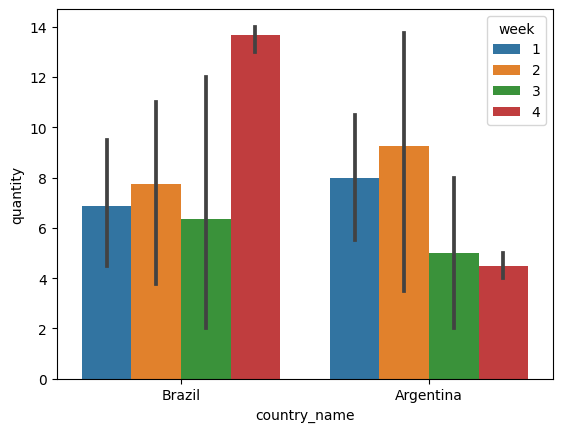

In [ ]:
sns.barplot(x='country_name', y='quantity', hue='week', data=ff)

In [ ]:
df40 = (my_df.groupby(['article_name','week']).sum()).sort_values('quantity', ascending=False)
print(df40)



                   quantity  total_amount
article_name week                        
HDD          2          158       8629.96
SDD          1          153       3366.00
Tablet       3          148      19240.00
HDD          3          129       7045.98
Mouse        2          125       3787.50
...                     ...           ...
Keyboard     4           14        316.40
Case         4           13        492.70
Wi-Fi Card   4           10        596.10
Desk         4            6        780.60
Scanner      4            1        185.00

[124 rows x 2 columns]


In [ ]:
paises=df40.index.get_level_values(0)
#df40.loc[('Brazil','Chair')]
paises

Index(['HDD', 'SDD', 'Tablet', 'HDD', 'Mouse', 'Netbook', 'Desk',
       'Power Supply', 'Ram Memory', 'Mouse',
       ...
       'HDD', 'Monitor', 'Headphones', 'Mesh Wi-Fi X 2', 'Mouse', 'Keyboard',
       'Case', 'Wi-Fi Card', 'Desk', 'Scanner'],
      dtype='object', name='article_name', length=124)

              quantity  total_amount
country_name                        
Brazil            2515     441271.85
Argentina          947     205832.78
Colombia           881     177514.29
Peru              1027     161421.12
Mexico             846     138619.99


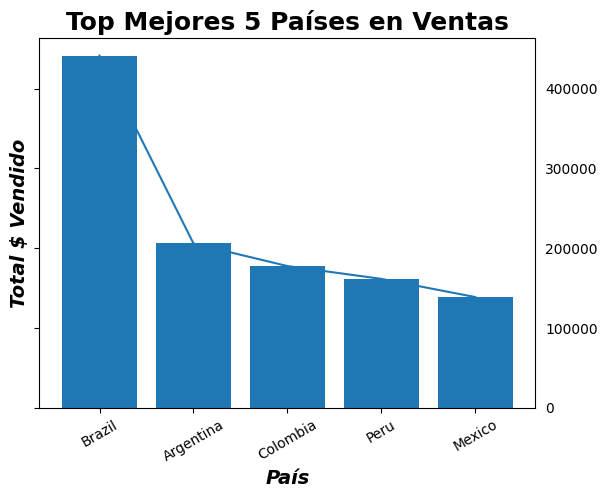

In [ ]:
my_df6=(my_df.groupby('country_name').sum()).sort_values('total_amount',ascending=False).head(5)
print(my_df6[['quantity']+['total_amount']])

# RESOLUCIÓN GRÁFICA
fig, graf5 = plt.subplots()
graf5.bar(my_df6.index,my_df6['total_amount'])
graf5.plot(my_df6['total_amount'])
graf5.yaxis.set_tick_params(labelleft=False,labelright=True)
graf5.xaxis.set_tick_params(rotation=30)

sns.set_palette('coolwarm')
plt.title('Top Mejores 5 Países en Ventas', size=18, fontweight='bold')
plt.ylabel('Total $ Vendido',fontstyle='italic',fontsize=14, fontweight='bold')
plt.xlabel('País',fontstyle='oblique',fontsize=14, fontweight='heavy')
plt.show()

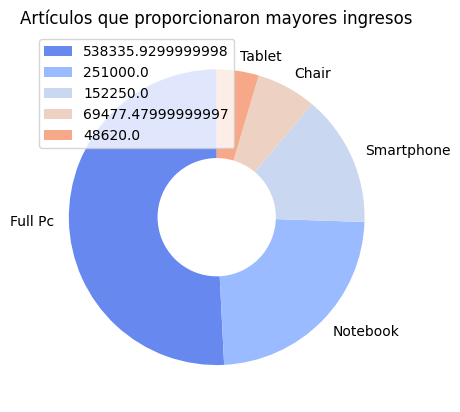

In [ ]:
plt.pie(x=my_df3['total_amount'],labels=my_df3.index, startangle=90) 
plt.legend(my_df3['total_amount'],loc='upper left') 
centre_cicle = plt.Circle((0,0),0.4, fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_cicle)
plt.title('Artículos que proporcionaron mayores ingresos')
plt.show()

In [ ]:
art2 = my_df[(my_df['article_name']== 'Notebook') | (my_df['article_name']== 'Full Pc') & ((my_df['country_name'] == 'Argentina') | (my_df['country_name']=='Brazil'))]

print(art2)

     week  quantity country_name article_name  total_amount        seller_name
16      1         6       Brazil      Full Pc      12766.86    Arnold Kilkenny
38      1         2       Brazil      Full Pc       4255.62           Jase Doy
70      1         5       Brazil      Full Pc      10639.05           Jase Doy
103     1        13         Peru     Notebook      13000.00   Cornie Wynrehame
108     1        13       Brazil     Notebook      13000.00    Arnold Kilkenny
112     1         9       Brazil      Full Pc      19150.29     Janel O'Curran
114     1         4       Brazil     Notebook       4000.00        Ewell Peres
142     1        11    Argentina     Notebook      11000.00    Vasily Danilyuk
160     1        12       Brazil      Full Pc      25533.72    Daisie Slograve
162     1         4       Brazil     Notebook       4000.00   Aveline Swanwick
167     1         6     Colombia     Notebook       6000.00   Milly Christoffe
193     1         6    Argentina     Notebook       

In [ ]:
my_df60=(ff.groupby('country_name').sum()).sort_values('total_amount',ascending=False)
print(my_df60)

              week  quantity  total_amount
country_name                              
Brazil          37       146     217052.03
Argentina       26        88     138751.45


In [ ]:
smarts = my_df[(my_df['article_name']== 'Smartphone')]
sa=(smarts.groupby('country_name').sum()).sort_values('total_amount',ascending=False)
print(sa)

              week  quantity  total_amount
country_name                              
Brazil          19        79       41475.0
Colombia        13        52       27300.0
Venezuela       10        32       16800.0
Mexico           6        29       15225.0
Argentina        5        25       13125.0
El Salvador      7        22       11550.0
Ecuador          4        15        7875.0
Peru             5        15        7875.0
Chile            3        12        6300.0
Uruguay          2         9        4725.0


             article_name  week  quantity  total_amount
country_name                                           
Brazil            Full Pc    17        63     134052.03
Argentina         Full Pc    10        45      95751.45
Brazil           Notebook    20        83      83000.00
Argentina        Notebook    16        43      43000.00
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country_name', ylabel='total_amount'>

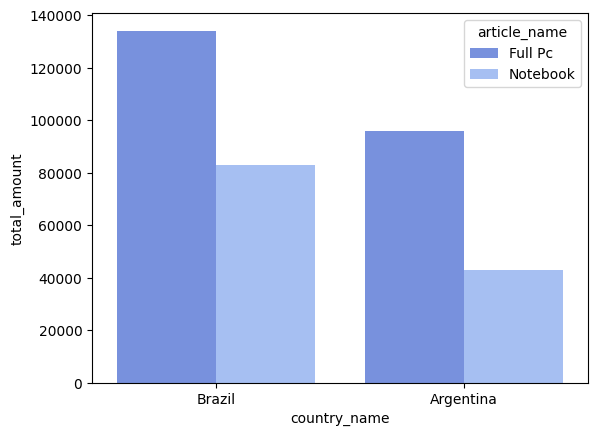

In [ ]:
# CONSULTA 13/7
# Graficando doble agrupamiento
ff=my_df[((my_df['country_name']=='Argentina') | (my_df['country_name']=='Brazil')) & ((my_df['article_name']=='Full Pc')|(my_df['article_name']=='Notebook')) ]
ff = ff.groupby(["article_name","country_name"]).sum().sort_values('total_amount',ascending=False)

# para facilitar la gráfica, uno de los índices que me quedaron después del agrupamiento, lo puedo convertir a columna nuevamente
ff.reset_index('article_name', inplace=True)
print(ff)
sns.barplot(ff.index.get_level_values(0), 'total_amount', data =ff, hue='article_name')


In [ ]:
df9 = my_df.groupby(["country_name","article_name"]).sum()
prod_cant = df9.sort_values("quantity", ascending=False) 
print(prod_cant)
print(prod_cant.loc[('Peru','Mouse')]['quantity'])

                           week  quantity  total_amount
country_name article_name                              
Brazil       Tablet          41       156      20280.00
Peru         Mouse           23       125       3787.50
Brazil       HDD             45       119       6499.78
             SDD             33       117       2574.00
             Chair           32       112      37591.68
...                         ...       ...           ...
Ecuador      SDD              2         1         22.00
             Modem            1         1         67.50
             Heatsink         2         1         10.00
Paraguay     Video Card       3         1        131.50
Chile        Netbook          2         1        145.00

[306 rows x 3 columns]
125.0


In [ ]:
# GRÁFICA BARRAS APILADAS
my_df8 = my_df[(my_df['article_name'] == 'Full Pc') | (my_df['article_name'] == 'Notebook')| (my_df['article_name'] == 'Tablet')| (my_df['article_name'] == 'Smartphone')| (my_df['article_name'] == 'Chair')]
print(my_df8)
my_df8b=(my_df8.groupby(['seller_name','article_name']).sum()).sort_values('quantity',ascending=False)
print(my_df8b)

     week  quantity country_name article_name  total_amount        seller_name
3       1         9       Brazil       Tablet       1170.00     Janel O'Curran
16      1         6       Brazil      Full Pc      12766.86    Arnold Kilkenny
20      1        10     Colombia       Tablet       1300.00    Daisie Slograve
22      1        15    Venezuela       Tablet       1950.00    Arnold Kilkenny
38      1         2       Brazil      Full Pc       4255.62           Jase Doy
..    ...       ...          ...          ...           ...                ...
985     4        10       Brazil       Tablet       1300.00   Milly Christoffe
988     4        13     Colombia      Full Pc      27661.53     Janel O'Curran
989     4        14       Mexico     Notebook      14000.00    Vasily Danilyuk
993     4         8       Brazil        Chair       2685.12  Oliviero Charkham
998     4        14       Brazil       Tablet       1820.00    Vasily Danilyuk

[163 rows x 6 columns]
                            

In [ ]:
my_df8b.reset_index(inplace=True)
print(my_df8b)

          seller_name article_name  week  quantity  total_amount
0      Janel O'Curran      Full Pc    13        56     119157.36
1    Brockie Patience       Tablet    11        50       6500.00
2   Oliviero Charkham       Tablet    13        49       6370.00
3    Milly Christoffe   Smartphone    12        47      24675.00
4    Brockie Patience      Full Pc    10        46      97879.26
..                ...          ...   ...       ...           ...
60   Aveline Swanwick       Tablet     4         4        520.00
61   Cornie Wynrehame        Chair     2         2        671.28
62    Vasily Danilyuk        Chair     4         1        335.64
63    Cirilo Grandham      Full Pc     3         1       2127.81
64           Jase Doy   Smartphone     1         1        525.00

[65 rows x 5 columns]


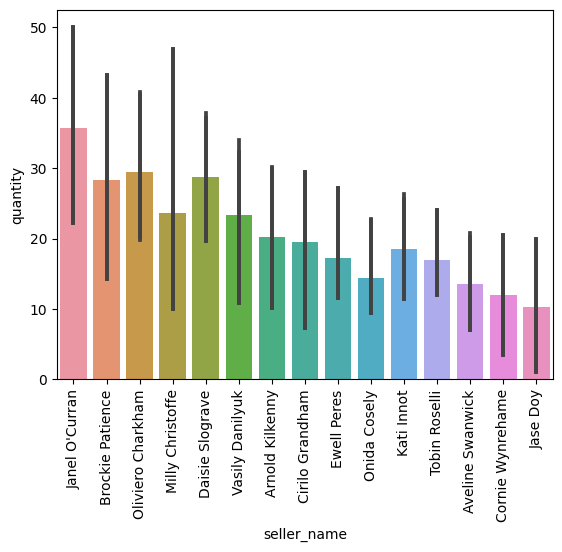

In [ ]:
s1= sns.barplot(x='seller_name',y='quantity',data=my_df8b)
s2= sns.barplot(x='seller_name',y='quantity',data=my_df8b)
plt.xticks(rotation=90)
plt.show()

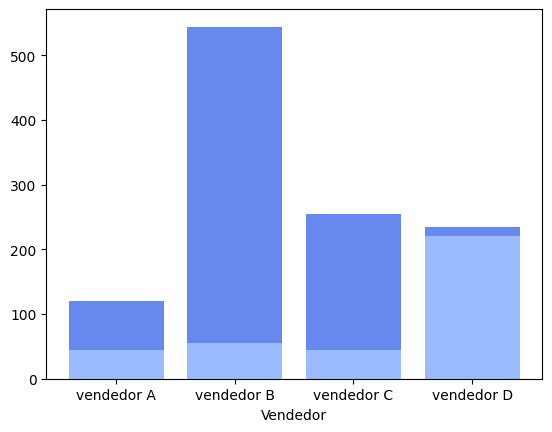

In [ ]:
vendedores = ['vendedor A', 'vendedor B', 'vendedor C', 'vendedor D']
full_pc = [120,544,254,235]
notebook = [45,55,45,221]

indice = np.arange(len(vendedores))

plt.bar(indice, full_pc, label='Full PC')
plt.bar(indice, notebook, label='Full PC')
plt.xticks(indice, vendedores)
plt.xlabel("Vendedor")
plt.show()